# Sonic The Hedgehog 2 RL with DQN

## ACT 1: Import Libraries

In [7]:
import retro
import time
from gym import Env
from gym.spaces import MultiBinary, Box
import numpy as np
import cv2
from matplotlib import pyplot as plt
import torch



import math

%matplotlib inline

In [22]:
import sys
sys.path.append('../../')
from dqn_agent import DQNAgent
from dqn_cnn import DQNCnn
from stack_frame import preprocess_frame, stack_frame

In [10]:

-m retro import .

SyntaxError: invalid syntax (3572413935.py, line 1)

## ACT 2: Create custom environment

In [9]:
class SonicTheHedgehog2(Env):
    def __init__(self):
        super().__init__()
        #Specify action space and observation space
        self.observation_space = Box(low= 0, 
                                    high=255, 
                                    shape=(84, 84, 1), 
                                    dtype=np.uint8)
        self.action_space = MultiBinary(12)
        # Startup an instance of the game
        self.game = retro.make(game='SonicTheHedgehog2-Genesis', 
                                state='EmeraldHillZone.Act1', 
                                scenario='contest',
                                use_restricted_actions=retro.Actions.FILTERED)

    def reset(self):
        # Return the first frame
        obs = self.game.reset()
        #Current Frame - Previous Frame
        obs = self.preprocess(obs)
        self.previous_frame = obs

        # Create a placeholder attribute to hold the score delta
        self.x = 0
        return obs
    
    def preprocess(self, observation):
        # Grayscaling
        gray = cv2.cvtColor(observation, cv2.COLOR_BGR2GRAY)
        # Resize
        resize = cv2.resize(gray, (84, 84), interpolation=cv2.INTER_CUBIC)
        # Add the channels value
        channels = np.reshape(resize, (84, 84, 1))
        return channels


    def step(self, action):
        # Take a step
        # Recieve the unprocessed items
        obs, reward, done, info = self.game.step(action)
        obs = self.preprocess(obs)

        # Frame Delta
        # Substract previous frame from the Current frame in order to see pixel changes
        frame_delta = obs - self.previous_frame
        self.previous_frame = obs

        #Reshape the reward function TODO
        reward = info['x'] - self.x
        self.x = info['x']

        return frame_delta, reward, done, info


    def render(self, *args, **kwargs):
        self.game.render()

    def close(self):
        self.game.close()

## ACT 3: Start the game environment

In [5]:
env.close()

In [10]:
env = SonicTheHedgehog2()
print("The size of frame is: ", env.observation_space.shape)
print("No. of Actions: ", env.action_space.n)

obs = env.reset()

done = False

#Limit Posible Actions
possible_actions = {
    # No Operation
    0: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    # Left
    1: [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
    # Right
    2: [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
    # Left, Down
    3: [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
    # Right, Down
    4: [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
    # Down
    5: [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    # Down, B
    6: [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    # B
    7: [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
}

The size of frame is:  (84, 84, 1)
No. of Actions:  12


<function matplotlib.pyplot.show(close=None, block=None)>

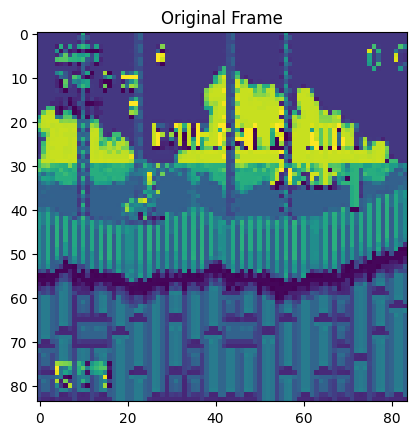

In [21]:
plt.figure()
plt.imshow(env.reset())
plt.title('Original Frame')
plt.show

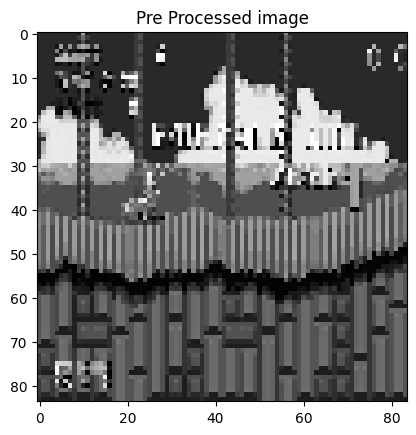

In [19]:
plt.figure()
plt.imshow(cv2.cvtColor(obs, cv2.COLOR_BGR2RGB))
plt.title('Pre Processed image')
plt.show()

In [ ]:
score = 0
for game in range(1):
    while not done:
        env.render()
        action = possible_actions[np.random.randint(len(possible_actions))]
        #Takes random desicions
        obs, reward, done, info = env.step(action)
        #time.sleep(0.005)
        score += reward

        if reward > 0:
            print(reward)
            
        if done:
            print("Your Score at the end of the game is: ")
            break

    env.reset()
    env.render(close=True)
    env.close()

c:\users\omen\appdata\local\programs\python\python37\lib\site-packages\pyglet\image\codecs\wic.py:406: UserWarning: [WinError -2147417850] Cannot change thread mode after it is set
  warnings.warn(str(err))


96
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
8
8
7
8
8
7
7
8
7
7
7
6
6
7
5
6
6
5
5
5
5
5
5
4
4
5
4
4
4
4
4
4
4
4
4
4
4

## ACT 4: Stacking Frame

In [ ]:
def stack_frames(frames,state, is_new=False)
    frame = preprocess_frame(state, 1, -1, -1, 1), 84)
    frames = stack_frame(frames, frame, is_new)
    
    return frames

## ACT 5: Creating our Agent
